In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [2]:
import os
file_two,file_one=os.listdir(path)
print('done')

done


In [3]:
file_one_path = path + '/' + file_one
file_two_path = path + '/' + file_two

In [4]:
print(file_one_path)
print(file_two_path)


C:\Users\Admin\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv
C:\Users\Admin\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv


In [5]:
# Step1 : Modules Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print('Done')

Done


In [6]:
df_matches=pd.read_csv(file_one_path)
df_deleveries=pd.read_csv(file_two_path)
print('done')

done


In [7]:
df_matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [8]:
df_deleveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
df_matches.shape

(1095, 20)

In [10]:
df_deleveries.shape

(260920, 17)

In [11]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [12]:
# columns
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
# Null values count
df_matches.isna().sum().sort_values(ascending = False)

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

<Axes: >

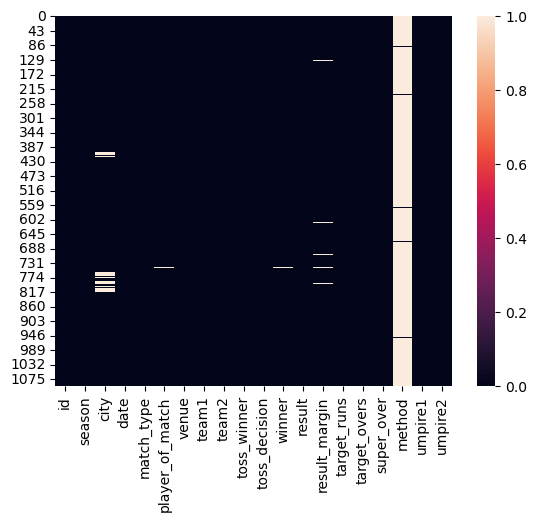

In [14]:
#heatmap it helps to identify the null values in a dataset
sns.heatmap(df_matches.isna())

In [15]:
#null valus count
df_matches.isna().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [16]:
df_matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [17]:
df_matches['method'].fillna('normal method',inplace=True)
print('done')

done


C:\Users\Admin\AppData\Local\Temp\ipykernel_33460\4057897002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('normal method',inplace=True)


In [18]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [19]:
#masking
df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,normal method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,normal method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,normal method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,normal method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,normal method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,normal method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,normal method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,normal method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,normal method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,normal method,Aleem Dar,VA Kulkarni


In [20]:
df_matches['city'].fillna('UAE',inplace = True)
print('done')


done


C:\Users\Admin\AppData\Local\Temp\ipykernel_33460\3975841457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace = True)


In [21]:
# Null values count
df_matches.isna().mean().sort_values(ascending = False)*100

result_margin      1.735160
player_of_match    0.456621
winner             0.456621
target_runs        0.273973
target_overs       0.273973
city               0.000000
season             0.000000
id                 0.000000
date               0.000000
team1              0.000000
venue              0.000000
match_type         0.000000
toss_decision      0.000000
toss_winner        0.000000
team2              0.000000
result             0.000000
super_over         0.000000
method             0.000000
umpire1            0.000000
umpire2            0.000000
dtype: float64

In [22]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,normal method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,normal method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,normal method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,normal method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,normal method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,normal method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,normal method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,normal method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,normal method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,normal method,AK Chaudhary,CB Gaffaney


In [23]:
df_matches['result_margin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: result_margin
Non-Null Count  Dtype  
--------------  -----  
1076 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [24]:
df_matches['result_margin'].fillna(0,inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33460\1935526264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0,inplace = True)


In [25]:
# Columns with Missing Values
# winner,player_of_match,target_overs,target_overs

In [26]:
df_matches[df_matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,normal method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,normal method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,normal method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,normal method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,normal method,AK Chaudhary,NA Patwardhan


In [27]:
df_matches.fillna({'player_of_match':'No Player of the match',
                   'winner':'No winner'},inplace=True)
print('done')

done


In [28]:
df_matches.fillna(0,inplace = True)
print('Done')

Done


In [29]:
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

<Axes: >

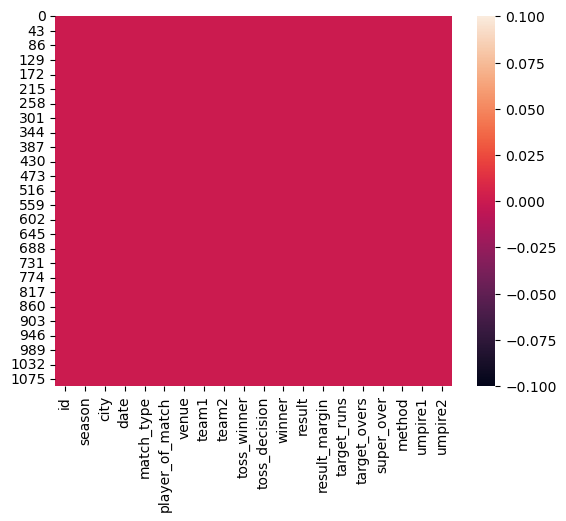

In [30]:

sns.heatmap(df_matches.isna())

In [31]:
df_matches['city'].value_counts()


city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [32]:
data_rp = {'Navi Mumbai':'Mumbai',
           'Bengaluru':'Bangalore',
           'Sharjah':'UAE',
           'Abu Dhabi':'UAE','Kimberley':'Cape Town','Dubai':'UAE'}


df_matches.replace(data_rp,inplace = True)
print('Done')

Done


In [33]:

# check Duplicacy
df_matches.duplicated('id').value_counts()

False    1095
Name: count, dtype: int64

In [34]:
#drop duplicates
df_matches.drop_duplicates('id',inplace = True)
print('Done')

Done


In [35]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [36]:
# Date column must be in date dtype
df_matches['date'] = pd.to_datetime(df_matches['date'])
print('done')

done


In [37]:
df_matches['venue'].value_counts().head(10)

venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: count, dtype: int64

In [38]:
for i in df_matches['venue'].value_counts().index:
  print(i)

Eden Gardens
Wankhede Stadium
M Chinnaswamy Stadium
Feroz Shah Kotla
Rajiv Gandhi International Stadium, Uppal
MA Chidambaram Stadium, Chepauk
Sawai Mansingh Stadium
Dubai International Cricket Stadium
Wankhede Stadium, Mumbai
Punjab Cricket Association Stadium, Mohali
Sheikh Zayed Stadium
Sharjah Cricket Stadium
MA Chidambaram Stadium, Chepauk, Chennai
Narendra Modi Stadium, Ahmedabad
Maharashtra Cricket Association Stadium
Dr DY Patil Sports Academy, Mumbai
Dr DY Patil Sports Academy
Brabourne Stadium, Mumbai
Subrata Roy Sahara Stadium
Eden Gardens, Kolkata
Arun Jaitley Stadium, Delhi
Kingsmead
M.Chinnaswamy Stadium
Rajiv Gandhi International Stadium
Arun Jaitley Stadium
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
M Chinnaswamy Stadium, Bengaluru
Rajiv Gandhi International Stadium, Uppal, Hyderabad
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Maharashtra Cricket Association Stadium, Pune
SuperSport Park
Sardar Patel Stadium, Motera
Punjab Cricket Asso

In [39]:
df_matches['venue'].str.split(',')

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [40]:
#apply is used to aplly rowise operations
df_matches['venue']=df_matches['venue'].apply(lambda row: row.title().split(',')[0])
print('done')

done


In [41]:
data_v_rp = {'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium',
             'Feroz Shah Kotla':'Arun Jaitley Stadium',
             'Sardar Patel Stadium':'Narendra Modi Stadium',
             'Punjab Cricket Association Is Bindra Stadium':'Punjab Cricket Association Stadium'}

df_matches['venue'].replace(data_v_rp,inplace = True)
print('Done')

Done


C:\Users\Admin\AppData\Local\Temp\ipykernel_33460\968704670.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['venue'].replace(data_v_rp,inplace = True)


In [42]:
df_matches['venue'].value_counts().head(10)

venue
Wankhede Stadium                       118
M Chinnaswamy Stadium                   94
Eden Gardens                            93
Arun Jaitley Stadium                    90
Ma Chidambaram Stadium                  85
Rajiv Gandhi International Stadium      77
Punjab Cricket Association Stadium      61
Sawai Mansingh Stadium                  57
Dubai International Cricket Stadium     46
Dr Dy Patil Sports Academy              37
Name: count, dtype: int64

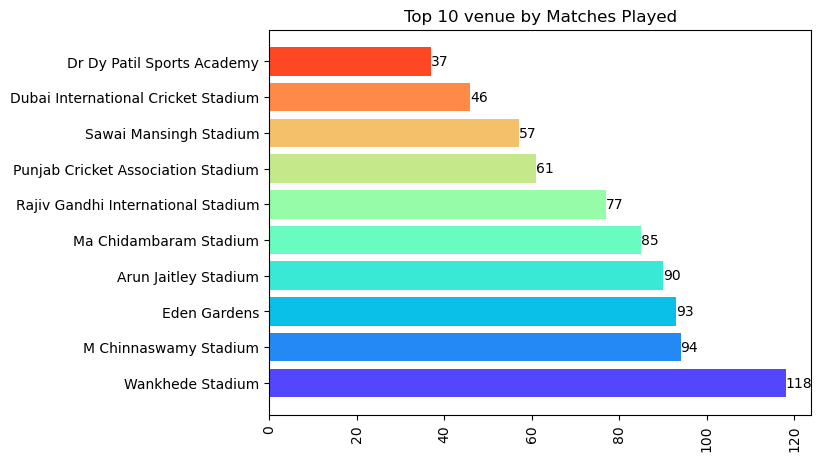

In [43]:
x = df_matches['venue'].value_counts().head(10).index
y = df_matches['venue'].value_counts().head(10).values


plt.figure(figsize = (7,5))
ax = plt.barh(x,y,color = sns.color_palette('rainbow',10))
plt.bar_label(ax)
plt.title('Top 10 venue by Matches Played')
plt.xticks(rotation = 90)
plt.show()

In [44]:
df_matches['team1'].value_counts().reset_index()

,team1,count
0,Royal Challengers Bangalore,135
1,Chennai Super Kings,128
2,Mumbai Indians,123
3,Kolkata Knight Riders,121
4,Rajasthan Royals,101
5,Kings XI Punjab,92
6,Sunrisers Hyderabad,86
7,Delhi Daredevils,85
8,Delhi Capitals,41
9,Deccan Chargers,39


In [45]:
import warnings
warnings.filterwarnings('ignore')
team_name_rp = {'Delhi Daredevils':'Delhi Capitals',
                'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiant':'Rising Pune Supergiants',
                'Pune Warriors':'Rising Pune Supergiants',
                'Gujarat Lions':'Gujarat Titans'}

df_matches[['team1','team2']] = df_matches[['team1','team2']].replace(team_name_rp)
print('Done')

Done


In [46]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,normal method,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,normal method,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,normal method,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,normal method,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,normal method,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,normal method,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Narendra Modi Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,normal method,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Narendra Modi Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,normal method,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Ma Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,normal method,Nitin Menon,VK Sharma


In [47]:
df_matches[]

SyntaxError: invalid syntax (1283394167.py, line 1)

In [48]:
df_matches[['toss_winner','winner']].replace(team_name_rp, inplace = True)
print('Done')

Done


In [49]:
# Drop # Umpire1 and Umpire2
df_matches.drop(['umpire1','umpire2'],axis= 1, inplace = True)

In [50]:
df_matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
394,598070,2013,Delhi,2013-05-21,Qualifier 1,MEK Hussey,Arun Jaitley Stadium,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,48.0,193.0,20.0,N,normal method
469,829729,2015,Mumbai,2015-04-17,League,A Nehra,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,wickets,6.0,184.0,20.0,N,normal method
1051,1426266,2024,Kolkata,2024-04-14,League,PD Salt,Eden Gardens,Lucknow Super Giants,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,8.0,162.0,20.0,N,normal method
40,336024,2007/08,Hyderabad,2008-05-18,League,DJ Bravo,Rajiv Gandhi International Stadium,Deccan Chargers,Mumbai Indians,Deccan Chargers,field,Mumbai Indians,runs,25.0,179.0,20.0,N,normal method
347,598022,2013,Kolkata,2013-04-20,League,RA Jadeja,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,4.0,120.0,20.0,N,normal method


In [51]:
df_matches['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [52]:
df_matches['toss_winner'].replace(team_name_rp,inplace = True)
df_matches['winner'].replace(team_name_rp,inplace = True)

In [53]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [54]:
df_matches.shape

(1095, 18)

In [55]:
df_matches['match_type'].value_counts()

match_type
League                1029
Final                   17
Qualifier 2             14
Qualifier 1             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [56]:
df_matches[df_matches['match_type'] == 'Final']['winner'].value_counts()

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

<Axes: ylabel='count'>

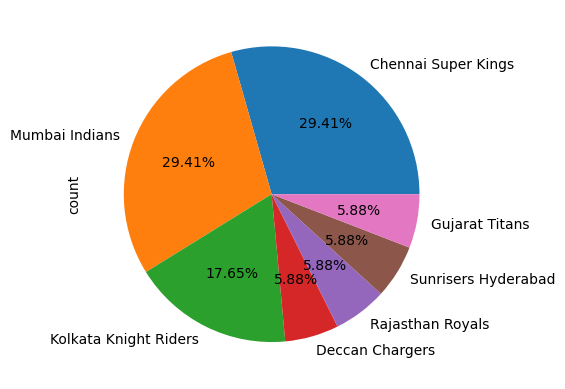

In [57]:
df_matches[df_matches['match_type'] == 'Final']['winner'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [58]:
# df_matches['date'].dt.year

In [59]:
final_match = df_matches[df_matches['match_type'] == 'Final']
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,normal method
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,normal method
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,normal method
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,normal method
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,normal method
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,normal method
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,normal method
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,normal method
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,normal method
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,normal method


In [60]:
final_match['Winning year'] = final_match['date'].dt.year
print('Done')

Done


In [61]:
final_match[['Winning year','winner']].sort_values('winner')

,Winning year,winner
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
1023,2023,Chennai Super Kings
695,2018,Chennai Super Kings
875,2021,Chennai Super Kings
114,2009,Deccan Chargers
949,2022,Gujarat Titans
1094,2024,Kolkata Knight Riders
321,2012,Kolkata Knight Riders
457,2014,Kolkata Knight Riders


In [62]:
final_match['result'].value_counts()

result
runs       9
wickets    8
Name: count, dtype: int64

In [63]:
final_match['toss_winner'].value_counts()

toss_winner
Chennai Super Kings            6
Mumbai Indians                 3
Rajasthan Royals               2
Sunrisers Hyderabad            2
Kolkata Knight Riders          2
Royal Challengers Bengaluru    1
Delhi Capitals                 1
Name: count, dtype: int64

In [64]:
final_match.groupby('venue')['result'].value_counts()

venue                                result 
Dr Dy Patil Sports Academy           runs       1
                                     wickets    1
Dubai International Cricket Stadium  runs       1
                                     wickets    1
Eden Gardens                         runs       2
M Chinnaswamy Stadium                runs       1
                                     wickets    1
Ma Chidambaram Stadium               wickets    2
                                     runs       1
Narendra Modi Stadium                wickets    2
New Wanderers Stadium                runs       1
Rajiv Gandhi International Stadium   runs       2
Wankhede Stadium                     wickets    1
Name: count, dtype: int64

In [65]:
df_matches.groupby('venue')['result'].value_counts().reset_index().sort_values(by='venue',)

,venue,result,count
0,Arun Jaitley Stadium,runs,44
1,Arun Jaitley Stadium,wickets,44
2,Arun Jaitley Stadium,no result,1
3,Arun Jaitley Stadium,tie,1
4,Barabati Stadium,runs,4
...,...,...,...
83,Wankhede Stadium,wickets,64
84,Wankhede Stadium,runs,53
85,Wankhede Stadium,tie,1
86,Zayed Cricket Stadium,wickets,5


In [66]:
#day13


In [67]:
df_matches.sample()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
1081,1426296,2024,Dharamsala,2024-05-09,League,V Kohli,Himachal Pradesh Cricket Association Stadium,Royal Challengers Bengaluru,Punjab Kings,Punjab Kings,field,Royal Challengers Bengaluru,runs,60.0,242.0,20.0,N,normal method


In [68]:
# Questions to be solve?
# Each season Winner Team
# Top 10 Match Winner team
# Toss_dicision_value_counts
# Result type value_counts
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Top 10 player_of_match
# Season Player of the match

In [69]:
# Q1: all season Winner team
final_match[['Winning year','winner']].sort_values('Winning year')

,Winning year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


<Axes: >

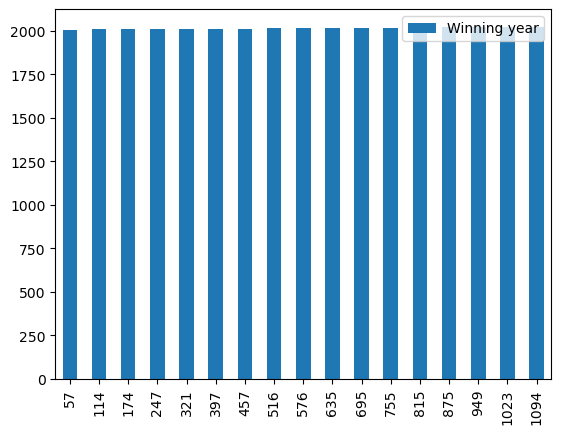

In [70]:
final_match[['Winning year','winner']].sort_values('Winning year').plot(kind = 'bar')

<Axes: >

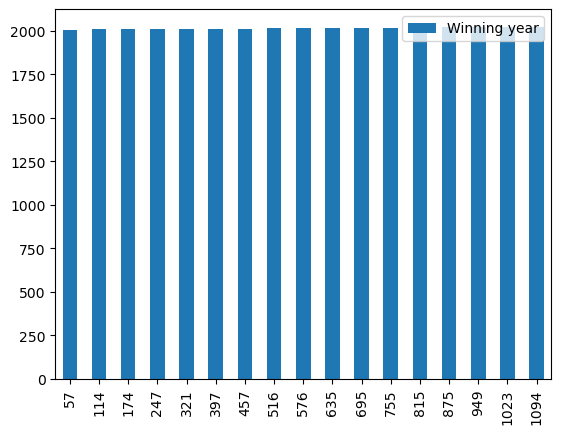

In [71]:
final_match[['Winning year','winner']].sort_values('Winning year').plot(kind = 'bar')

In [72]:
#Q2 Top 10 Match Winner team

In [73]:
df_matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Rajasthan Royals               112
Punjab Kings                   112
Sunrisers Hyderabad             88
Gujarat Titans                  41
Deccan Chargers                 29
Name: count, dtype: int64

In [74]:
#Q3 Toss_dicision_value_counts

In [75]:
#all univariate analysis
num_cols=df_matches.describe().columns
cat_cols=df_matches.describe(include='O').columns

In [76]:
print(num_cols)

Index(['id', 'date', 'result_margin', 'target_runs', 'target_overs'], dtype='object')


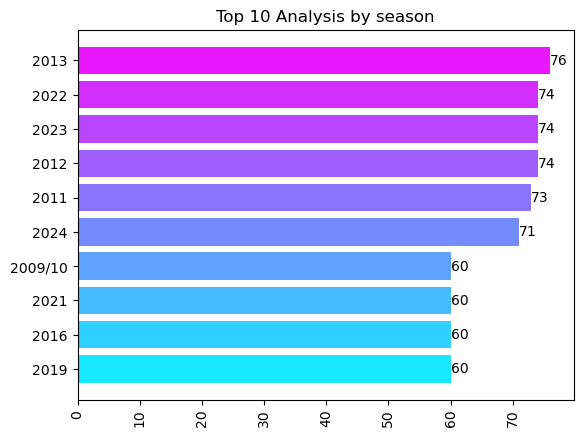

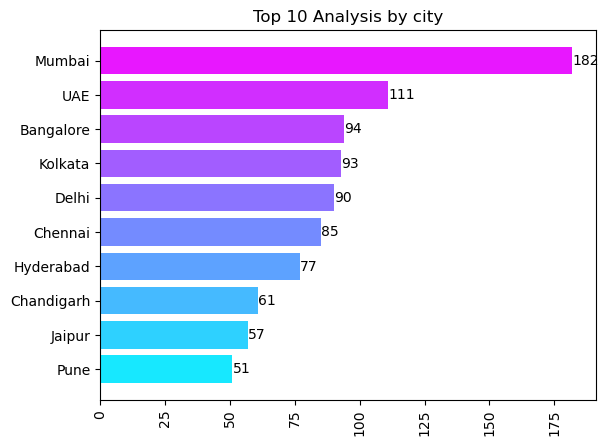

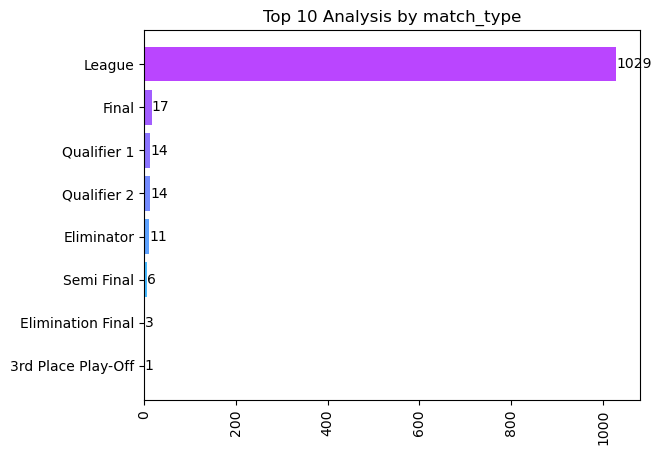

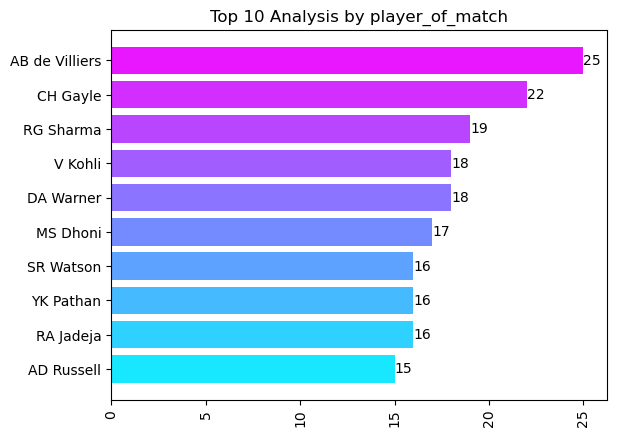

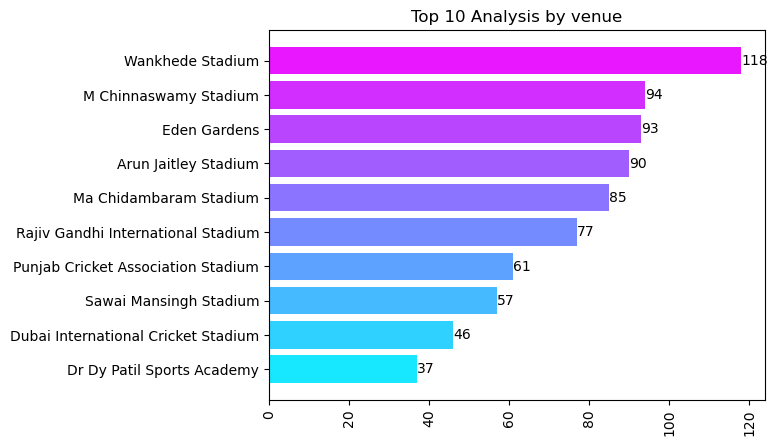

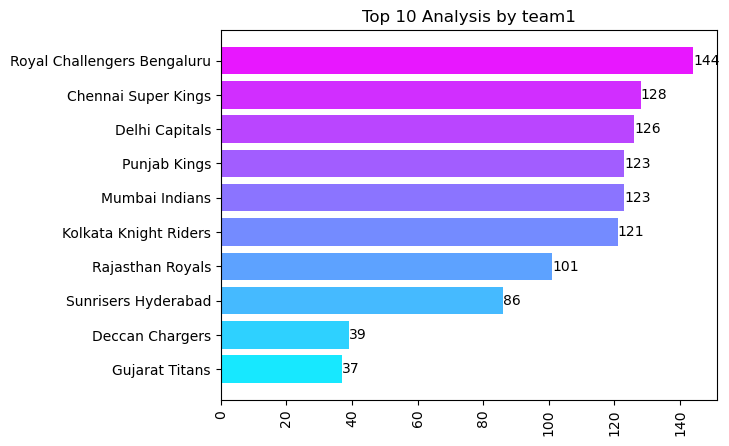

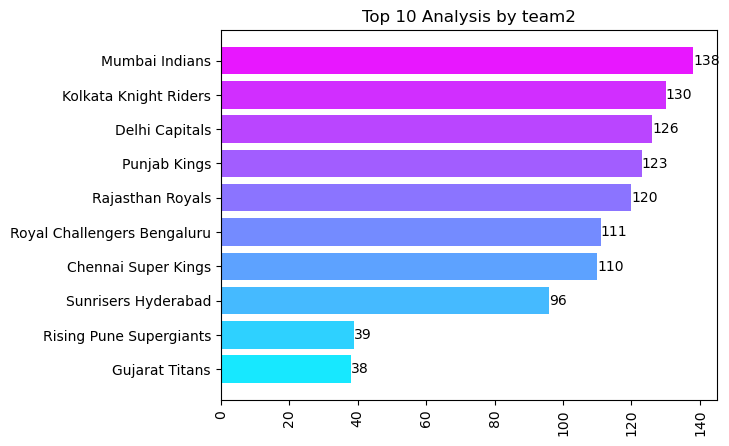

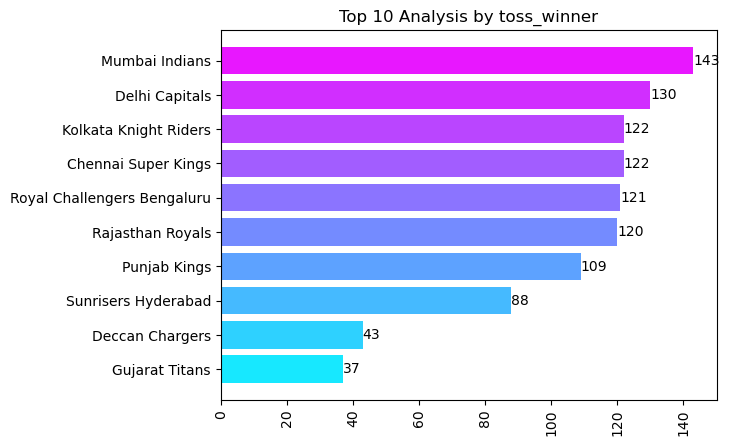

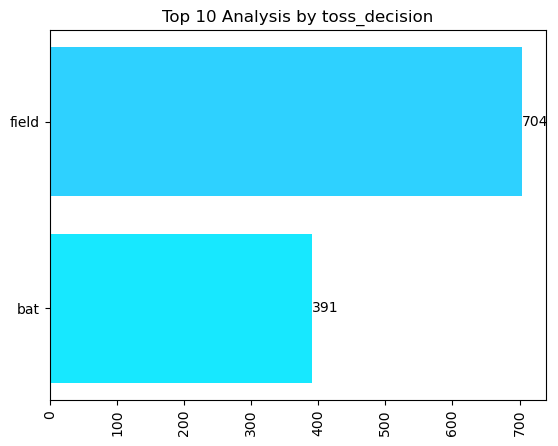

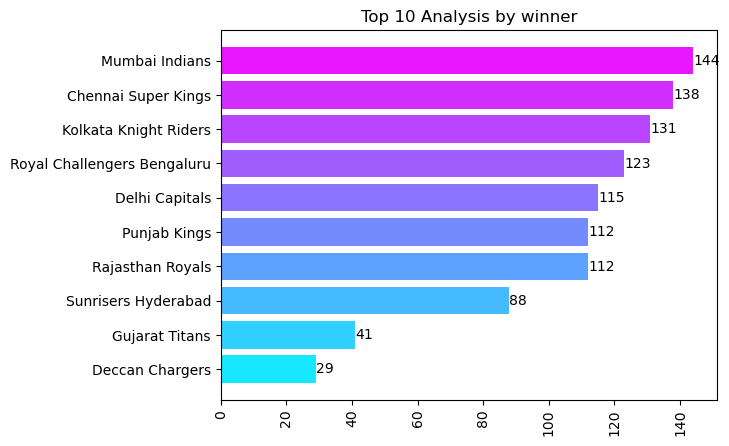

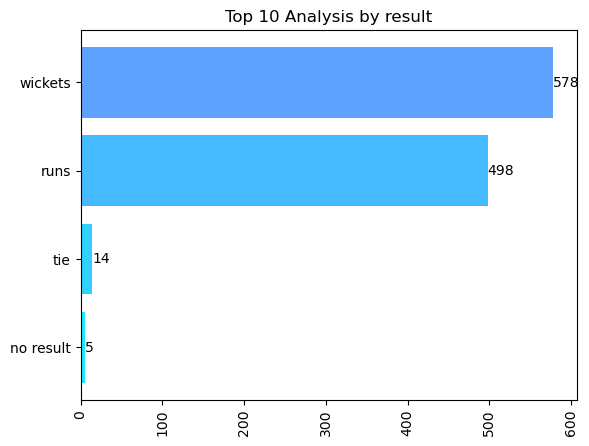

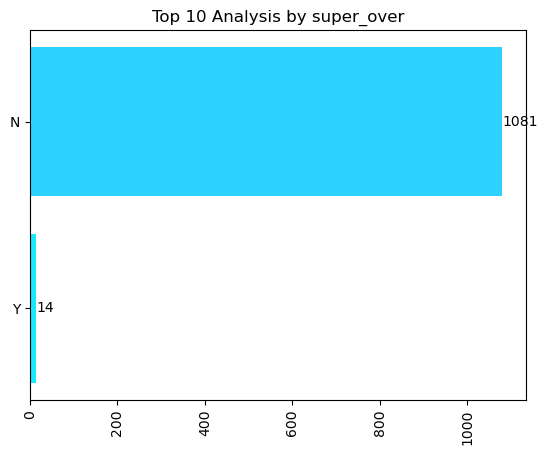

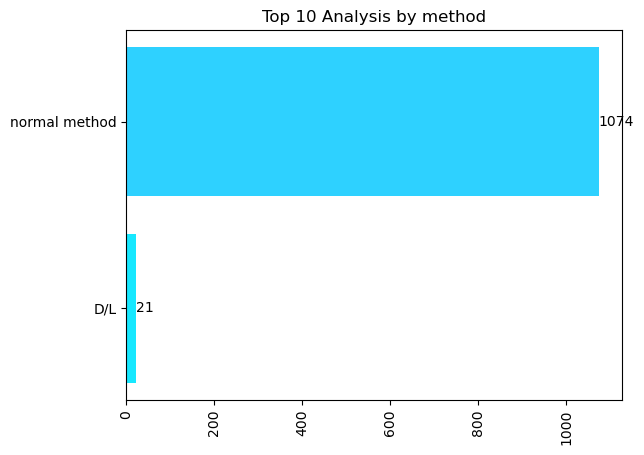

In [77]:
for i in cat_cols:
  try:
    temp_df = df_matches[i].value_counts().head(10).sort_values(ascending=True)
    x = temp_df.index
    y = temp_df.values

    plt.title(f'Top 10 Analysis by {i}')
    ax = plt.barh(x,y,color = sns.color_palette('cool',10))
    plt.bar_label(ax)  

    plt.xticks(rotation = 90)
    plt.show()
  except:
    pass

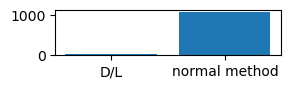

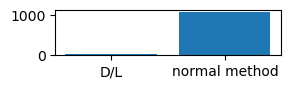

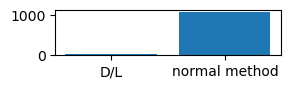

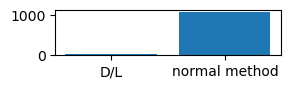

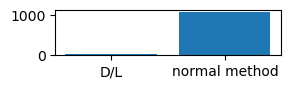

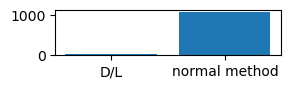

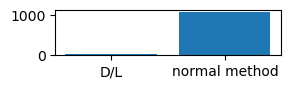

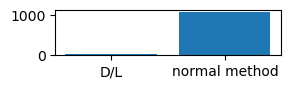

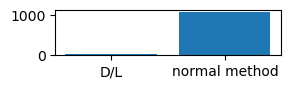

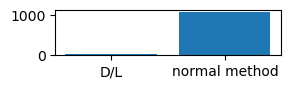

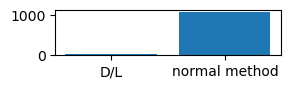

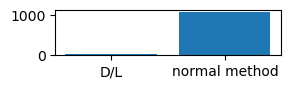

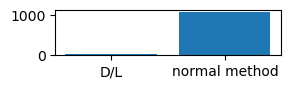

In [78]:
for i in range(len(cat_cols)):
  plt.subplot(7,2,i+1)
  plt.bar(x,y)
  plt.show()

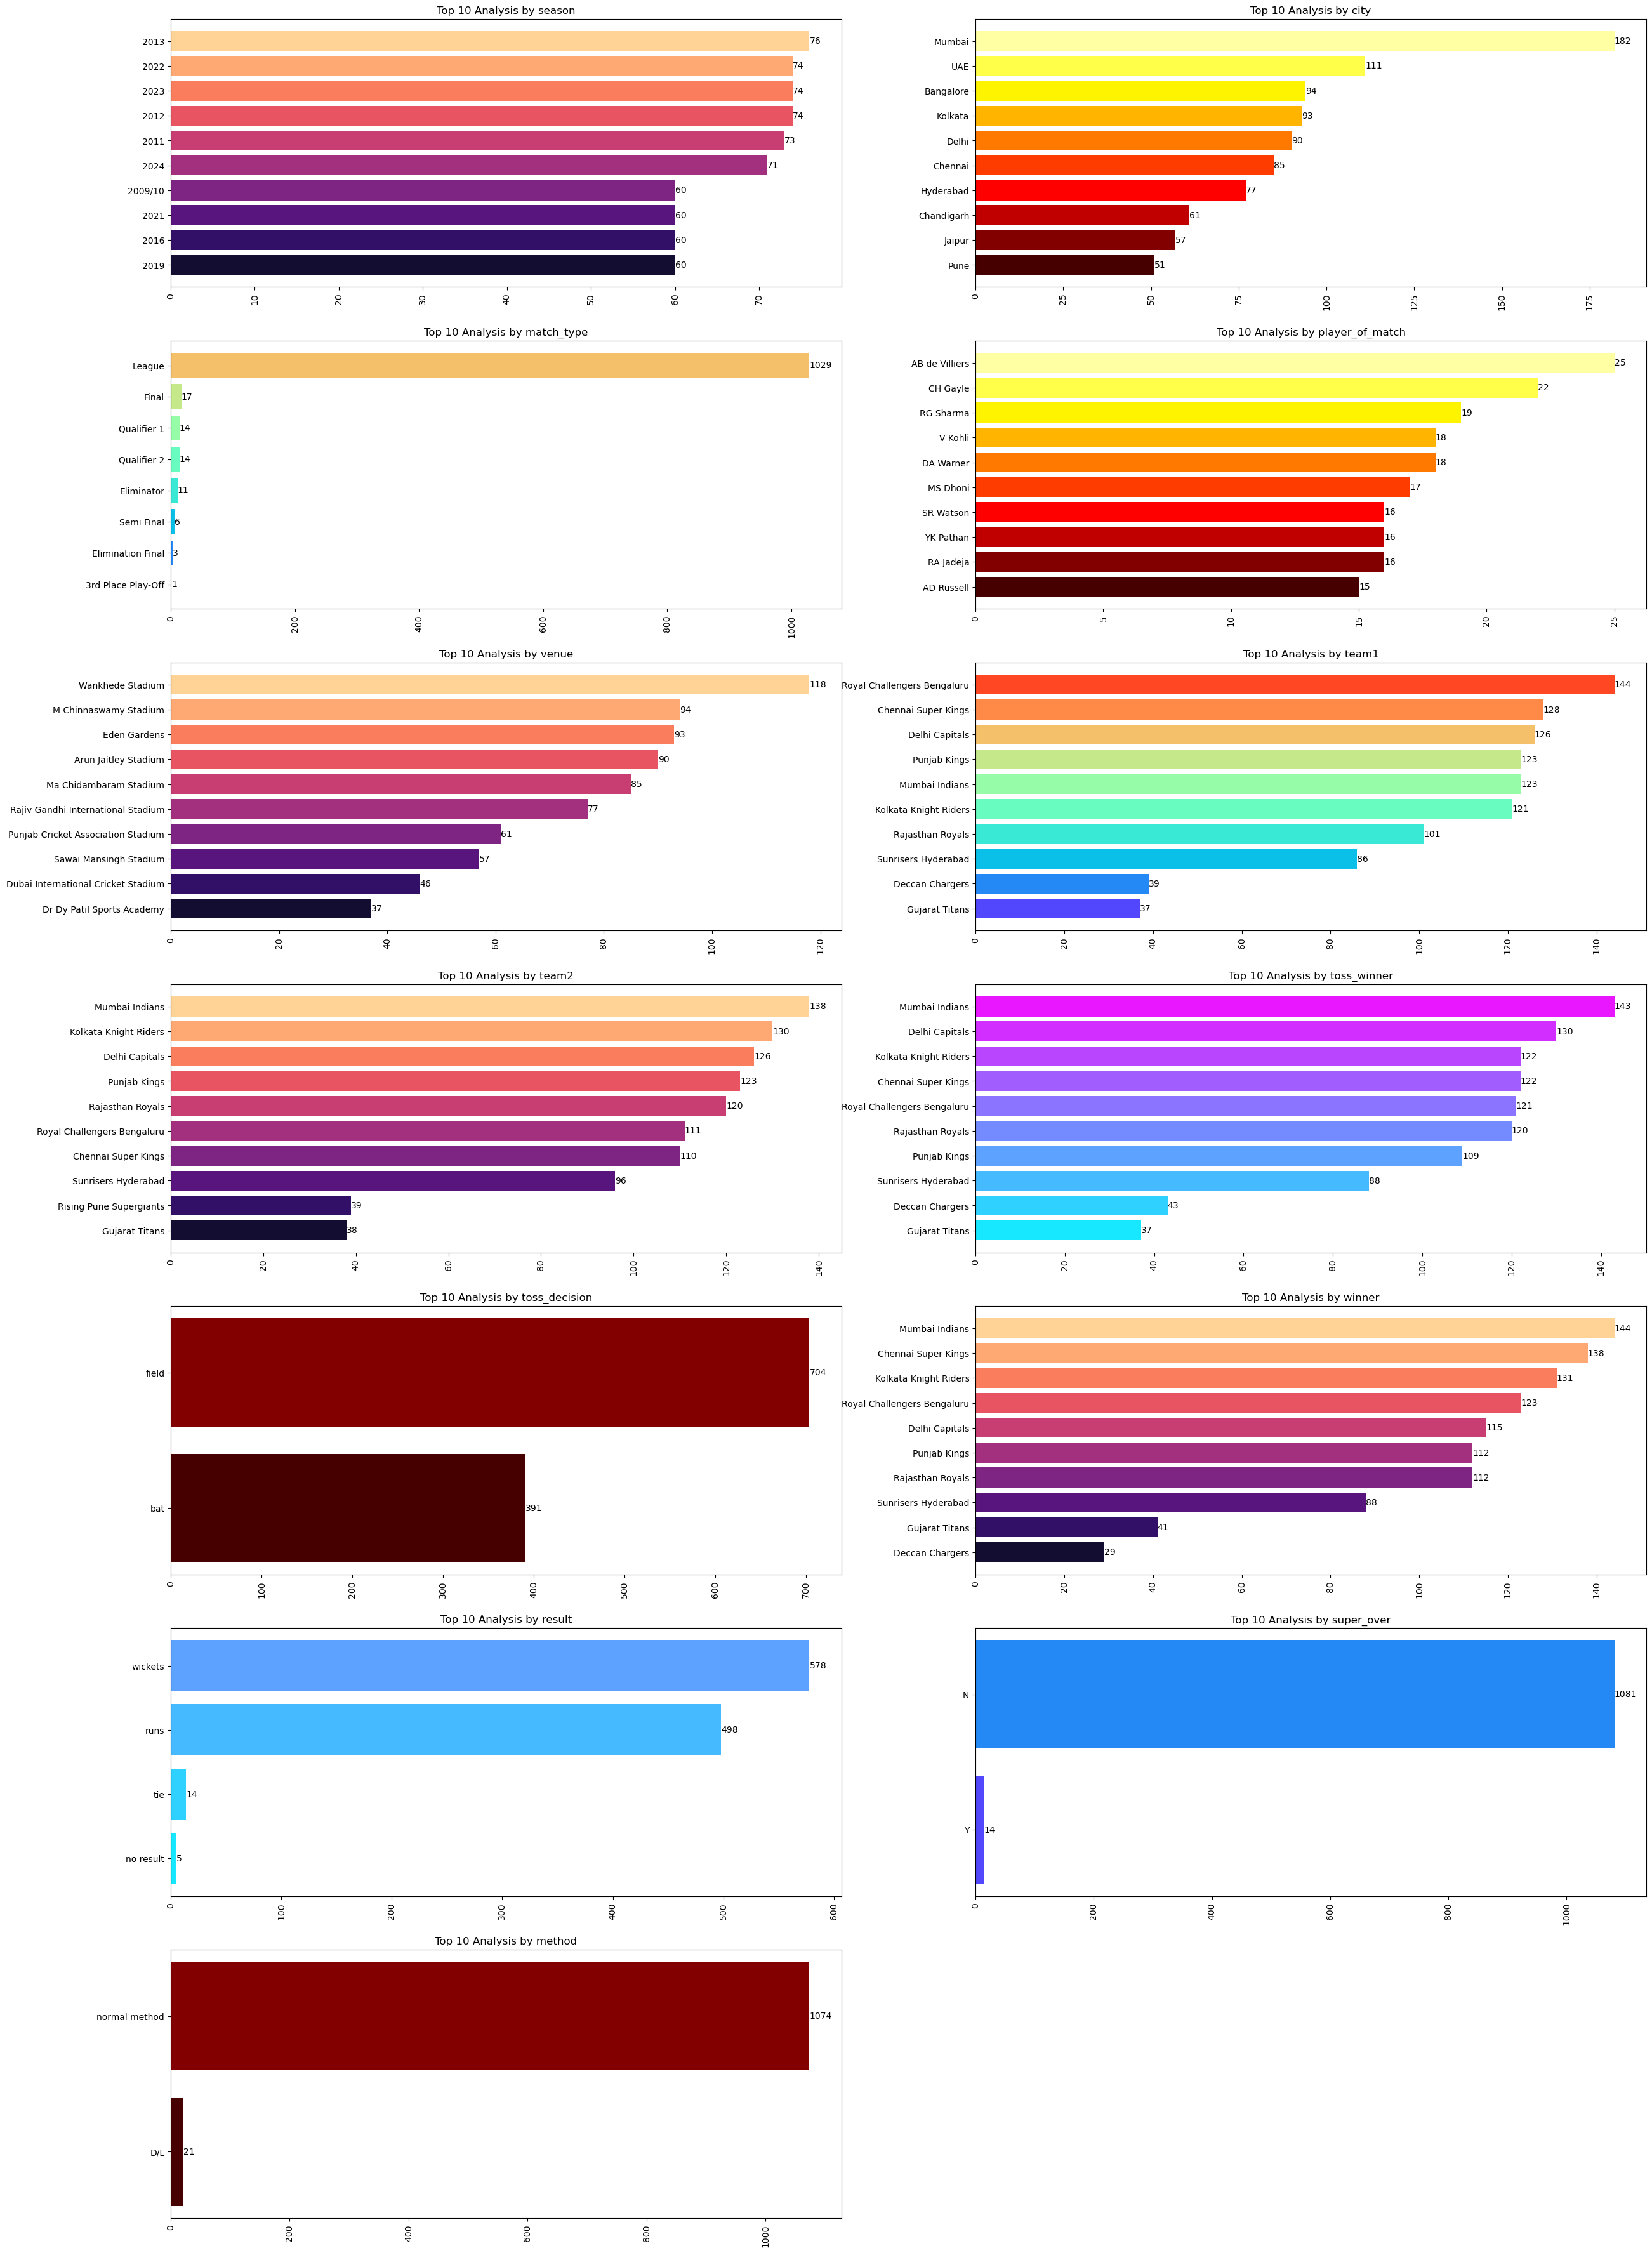

Done


In [79]:
# len(cat_cols)

plt.figure(figsize = (30,45))
for j,i in enumerate(cat_cols):
  temp_df = df_matches[i].value_counts().head(10).sort_values(ascending = True)
  x = temp_df.index
  y = temp_df.values

  plt.subplot(7,2,j+1)
  plt.title(f'Top 10 Analysis by {i}')
  colors = ['cool','mako','rainbow','magma','hot']
  import random
  ax = plt.barh(x,y,color = sns.color_palette(random.choice(colors),10))
  plt.bar_label(ax)
  plt.xticks(rotation = 90)

plt.savefig('All_Categorical_Analysis.jpeg')
plt.show()
print('Done')


In [80]:
df_matches['toss_decision'].value_counts()

toss_decision
field    704
bat      391
Name: count, dtype: int64

In [81]:
num_cols = df_matches.describe().columns
num_cols = list(num_cols)

num_cols.remove('id')
num_cols.remove('date')
num_cols.remove('target_overs')
num_cols

if 'result_margin' not in num_cols:
  num_cols.append('result_margin')

print(num_cols)

['result_margin', 'target_runs']


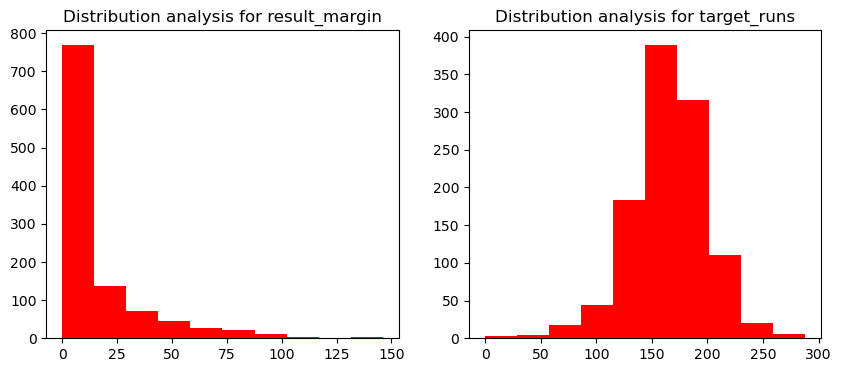

In [82]:
# Numerical Histogram
plt.figure(figsize = (10,4))
for j,i in enumerate(num_cols):
  plt.subplot(1,2,j+1)
  plt.title(f'Distribution analysis for {i}')
  plt.hist(df_matches[i],color = 'red')
plt.show()

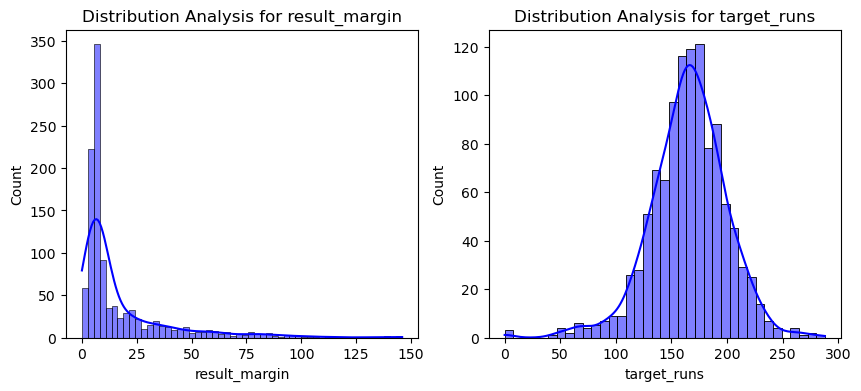

In [83]:
# Numerical Histogram
plt.figure(figsize = (10,4))
for j,i in enumerate(num_cols):
  plt.subplot(1,2,j+1)
  plt.title(f'Distribution Analysis for {i}')
  sns.histplot(df_matches[i],color = 'blue',kde = True) #Kernel Density Estimator (KDE)
plt.show()

In [84]:
#max target runs which team?
df_matches[df_matches['target_runs']==df_matches['target_runs'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
1053,1426268,2024,Bangalore,2024-04-15,League,TM Head,M Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,normal method


In [85]:
#min target runs which team?
df_matches[df_matches['target_runs']==df_matches['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
241,501265,2011,Delhi,2011-05-21,League,No Player of the match,Arun Jaitley Stadium,Delhi Capitals,Rising Pune Supergiants,Delhi Capitals,bat,No winner,no result,0.0,0.0,0.0,N,normal method
485,829763,2015,Bangalore,2015-04-29,League,No Player of the match,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,No winner,no result,0.0,0.0,0.0,N,normal method
994,1359519,2023,Lucknow,2023-05-03,League,No Player of the match,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,No winner,no result,0.0,0.0,0.0,N,normal method


In [86]:
# Min Target Runs which team?
temp_df = df_matches[df_matches['winner'] != 'No winner']
temp_df[temp_df['target_runs'] == temp_df['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Arun Jaitley Stadium,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L


In [87]:
df_matches.describe()

,id,date,result_margin,target_runs,target_overs
count,1.095000e+03,1095,1095.000000,1095.000000,1095.000000
mean,9.048283e+05,2016-06-25 11:39:36.986301184,16.959817,165.230137,19.705205
min,3.359820e+05,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,5.483315e+05,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809610e+05,2016-05-03 00:00:00,8.000000,166.000000,20.000000
75%,1.254062e+06,2021-04-13 12:00:00,19.000000,187.000000,20.000000
max,1.426312e+06,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.677402e+05,NaN,21.714792,34.487313,1.887000


In [88]:
df_matches['target_runs'].value_counts().sort_index().head()

target_runs
0.0     3
43.0    1
48.0    1
52.0    1
53.0    1
Name: count, dtype: int64

In [89]:
df_matches[df_matches['date'].dt.year == 2017].sort_values(by = 'winner')[['winner','result','result_margin']]

,winner,result,result_margin
617,Delhi Capitals,wickets,7.0
615,Delhi Capitals,wickets,6.0
591,Delhi Capitals,runs,51.0
627,Delhi Capitals,runs,7.0
625,Delhi Capitals,wickets,2.0
585,Delhi Capitals,runs,97.0
589,Gujarat Titans,wickets,7.0
599,Gujarat Titans,wickets,4.0
606,Gujarat Titans,wickets,7.0
622,Gujarat Titans,wickets,6.0


In [90]:
# LOC , ILOC
# Index = 603

In [91]:
df_matches.iloc[603,:]

id                                     1082617
season                                    2017
city                                   Kolkata
date                       2017-04-23 00:00:00
match_type                              League
player_of_match                NM Coulter-Nile
venue                             Eden Gardens
team1                    Kolkata Knight Riders
team2              Royal Challengers Bengaluru
toss_winner        Royal Challengers Bengaluru
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                             82.0
target_runs                              132.0
target_overs                              20.0
super_over                                   N
method                           normal method
Name: 603, dtype: object

In [92]:
# Stadium wise Team highest score

df_matches.groupby(['venue','team1'])['target_runs'].agg(['max','min','mean'])

max    min        mean
venue                 team1                                                
Arun Jaitley Stadium  Chennai Super Kings          224.0  193.0  212.000000
                      Delhi Capitals               258.0    0.0  164.971831
                      Gujarat Titans               163.0  163.0  163.000000
                      Kolkata Knight Riders        186.0  128.0  157.000000
                      Mumbai Indians               169.0  169.0  169.000000
...                                                  ...    ...         ...
Zayed Cricket Stadium Kolkata Knight Riders        172.0  172.0  172.000000
                      Mumbai Indians               236.0  156.0  196.000000
                      Punjab Kings                 136.0  136.0  136.000000
                      Royal Challengers Bengaluru   93.0   93.0   93.000000
                      Sunrisers Hyderabad          142.0  142.0  142.000000

[210 rows x 3 columns]

In [93]:
# Pivot table

df_matches['year'] = df_matches['date'].dt.year
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'year'],
      dtype='object')

In [94]:
all_team_year_df = df_matches.pivot_table(index = 'year',columns ='team1',values = 'target_runs')
all_team_year_df = all_team_year_df.round(0)

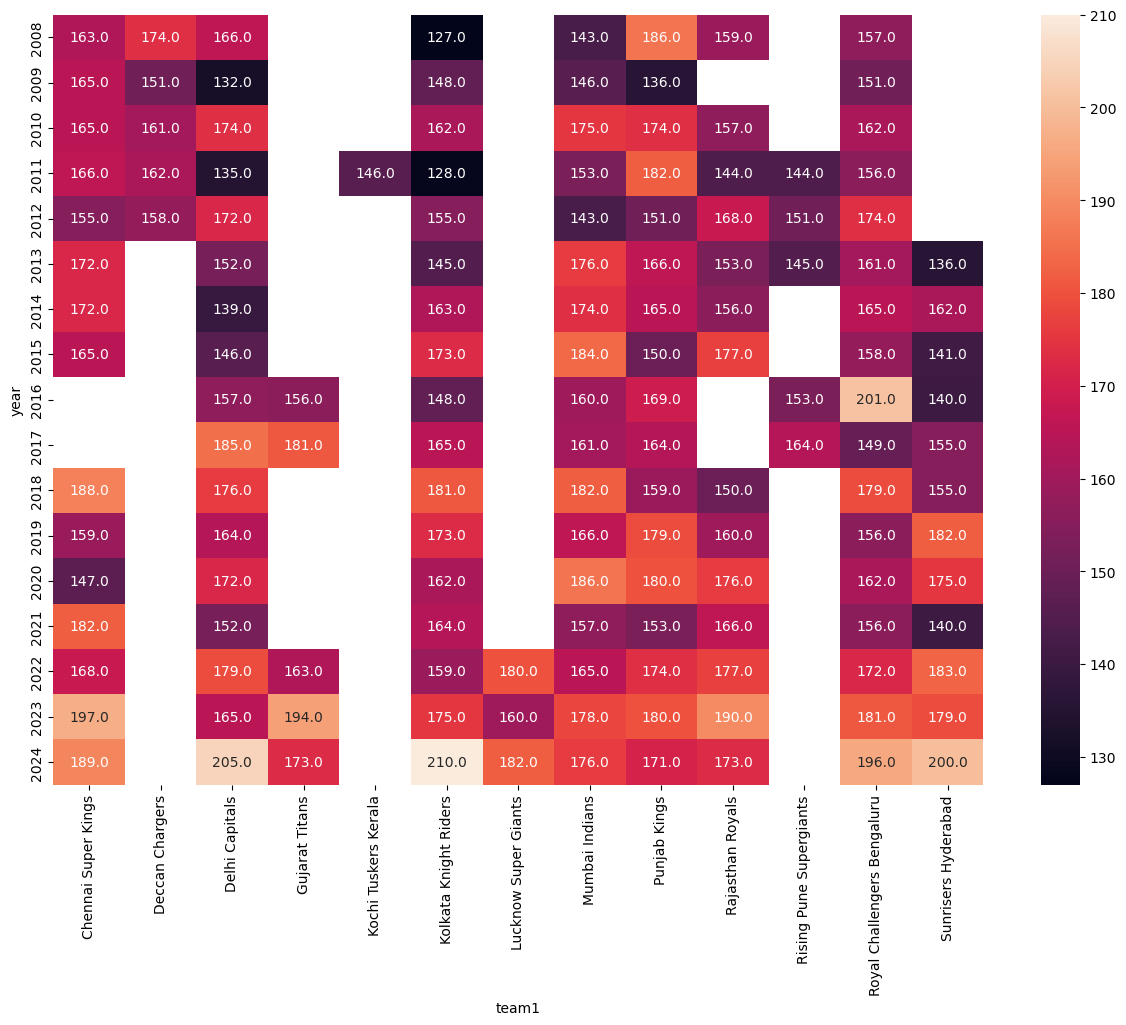

In [95]:
plt.figure(figsize = (15,10))
# pd.options.display.float_format = '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot = True)
plt.show()

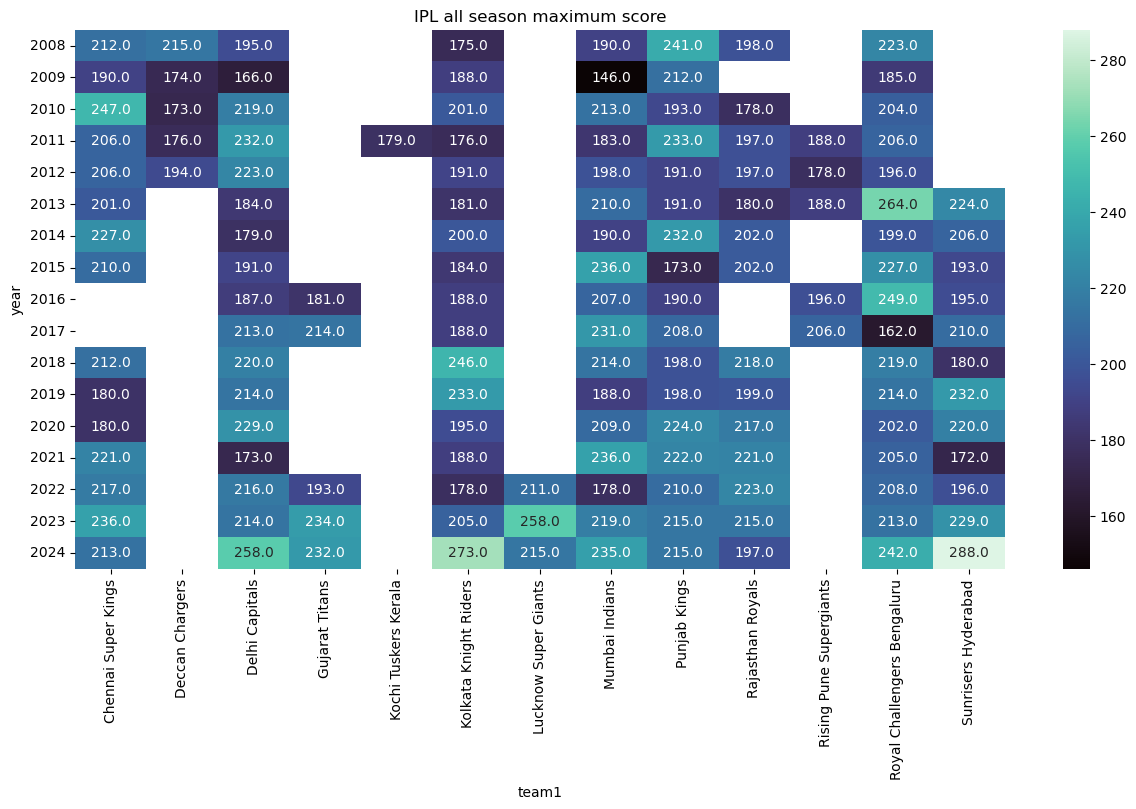

In [96]:
all_team_year_df = df_matches.pivot_table(index = 'year',columns ='team1',values = 'target_runs',aggfunc= 'max')
all_team_year_df = all_team_year_df.round(0)

plt.figure(figsize = (15,7))
# pd.options.display.float_format = '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot = True,cmap='mako')
plt.title('IPL all season maximum score')
plt.show()

In [97]:
#loc vs iloc
#loc: location name
#iloc: index pass

In [98]:
df_matches.loc[50:55,['team1','team2','result']]

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bengaluru,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs
55,Delhi Capitals,Rajasthan Royals,runs


In [99]:
df_matches.iloc[50:55,[7,8,12]]

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bengaluru,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs


In [100]:
# 2016> all rows and columns last 3

In [101]:
rows = df_matches[df_matches['year']>=2016].index
df_matches.iloc[rows ,-3:]

,super_over,method,year
517,N,normal method,2016
518,N,normal method,2016
519,N,normal method,2016
520,N,normal method,2016
521,N,normal method,2016
...,...,...,...
1090,N,normal method,2024
1091,N,normal method,2024
1092,N,normal method,2024
1093,N,normal method,2024


In [102]:
df_deleveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
254899,1426284,1,Chennai Super Kings,Sunrisers Hyderabad,16,4,S Dube,T Natarajan,RD Gaikwad,1,0,1,NaN,0,NaN,NaN,NaN
236016,1359516,1,Rajasthan Royals,Mumbai Indians,2,5,JC Buttler,C Green,YBK Jaiswal,0,0,0,NaN,0,NaN,NaN,NaN
257383,1426294,2,Rajasthan Royals,Delhi Capitals,11,7,SB Dubey,Kuldeep Yadav,SV Samson,0,0,0,NaN,0,NaN,NaN,NaN
251378,1426269,2,Rajasthan Royals,Kolkata Knight Riders,12,3,R Powell,CV Varun,JC Buttler,1,0,1,NaN,0,NaN,NaN,NaN
196639,1254070,1,Mumbai Indians,Delhi Capitals,13,3,J Yadav,MP Stoinis,Ishan Kishan,0,0,0,NaN,0,NaN,NaN,NaN


In [103]:
df_deleveries.iloc[123257,:]

match_id                                 980907
inning                                        1
batting_team        Royal Challengers Bangalore
bowling_team                Sunrisers Hyderabad
over                                         16
ball                                          6
batter                                SR Watson
bowler                                KV Sharma
non_striker                      AB de Villiers
batsman_runs                                  6
extra_runs                                    0
total_runs                                    6
extras_type                                 NaN
is_wicket                                     0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                     NaN
Name: 123257, dtype: object

In [104]:
df_deleveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [105]:
df_deleveries.isna().sum().sort_values(ascending = False)

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
non_striker              0
bowler                   0
batter                   0
ball                     0
total_runs               0
extra_runs               0
batsman_runs             0
is_wicket                0
dtype: int64

In [106]:
df_deleveries.isna().sum().sort_values(ascending = False)

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
non_striker              0
bowler                   0
batter                   0
ball                     0
total_runs               0
extra_runs               0
batsman_runs             0
is_wicket                0
dtype: int64

In [107]:
df_deleveries.loc[:,['fielder','dismissal_kind','player_dismissed','extras_type']]

,fielder,dismissal_kind,player_dismissed,extras_type
0,NaN,NaN,NaN,legbyes
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,wides
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
260915,NaN,NaN,NaN,NaN
260916,NaN,NaN,NaN,NaN
260917,NaN,NaN,NaN,NaN
260918,NaN,NaN,NaN,NaN


In [108]:
normal_cols = ['fielder','dismissal_kind','player_dismissed','extras_type']

In [109]:
for i in normal_cols:
  print('Analysis f')
  display(df_deleveries[i].value_counts().head(10))

Analysis f


fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis f


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis f


player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis f


extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [110]:
for i in normal_cols:
  print(f'Analysis for {i}\n\n')
  display(df_deleveries[i].value_counts().head(10))

Analysis for fielder




fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis for dismissal_kind




dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis for player_dismissed




player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis for extras_type




extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

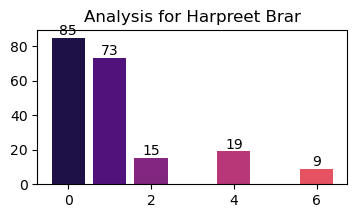

Harpreet Brar Total Runs in IPL History: 233
Batsman Harpreet Brar Top 10 Performance Against Bowlers


,bowler,sum,mean
12,HV Patel,30,2.5000
30,R Sai Kishore,17,2.1250
16,JJ Bumrah,11,0.6875
25,MM Sharma,10,2.0000
10,G Coetzee,9,1.8000
19,K Rabada,9,1.8000
38,SP Narine,9,1.0000
47,VG Arora,9,1.8000
14,I Sharma,8,1.0000
6,B Kumar,8,1.6000


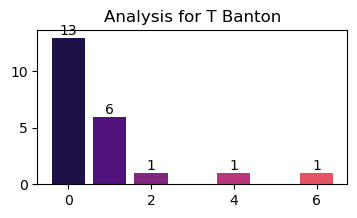

T Banton Total Runs in IPL History: 18
Batsman T Banton Top 10 Performance Against Bowlers


,bowler,sum,mean
2,Navdeep Saini,13,1.181818
1,Mohammed Siraj,3,0.333333
0,CH Morris,2,1.000000


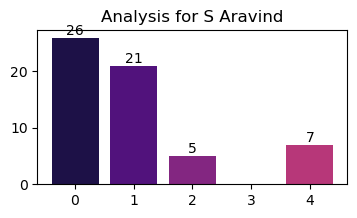

S Aravind Total Runs in IPL History: 59
Batsman S Aravind Top 10 Performance Against Bowlers


,bowler,sum,mean
1,A Singh,13,2.600000
19,SJ Srivastava,10,2.500000
9,DT Christian,9,1.125000
13,JD Unadkat,5,1.250000
2,AJ Tye,4,0.571429
7,CR Woakes,4,1.333333
14,JP Faulkner,2,0.400000
11,GJ Maxwell,2,0.400000
20,VR Aaron,2,2.000000
5,Basil Thampi,2,1.000000


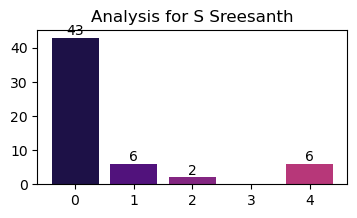

S Sreesanth Total Runs in IPL History: 34
Batsman S Sreesanth Top 10 Performance Against Bowlers


,bowler,sum,mean
7,Jaskaran Singh,12,2.400000
10,PJ Sangwan,9,1.800000
3,DP Nannes,5,0.714286
14,SK Trivedi,4,0.666667
9,MF Maharoof,1,0.333333
6,JH Kallis,1,0.500000
15,SL Malinga,1,0.166667
2,AC Thomas,1,0.500000
0,A Mishra,0,0.000000
8,L Balaji,0,0.000000


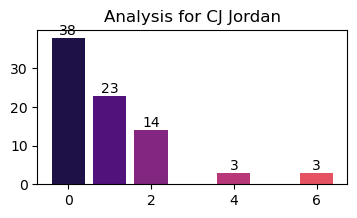

CJ Jordan Total Runs in IPL History: 81
Batsman CJ Jordan Top 10 Performance Against Bowlers


,bowler,sum,mean
10,M Prasidh Krishna,13,2.600000
17,PJ Cummins,11,2.750000
2,B Kumar,7,1.400000
23,TA Boult,6,2.000000
15,NM Coulter-Nile,6,1.500000
6,K Rabada,5,1.000000
3,CV Varun,4,0.666667
18,RD Chahar,3,0.750000
22,T Natarajan,3,0.600000
20,SN Thakur,3,1.000000


In [129]:
import random
for i in random.choices(all_batsman,k = 5):
  get_player_perfromance_stats(i)


In [112]:
# Fill NAN Values

df_deleveries.fillna('Unknown', inplace = True)
print('Done')

Done


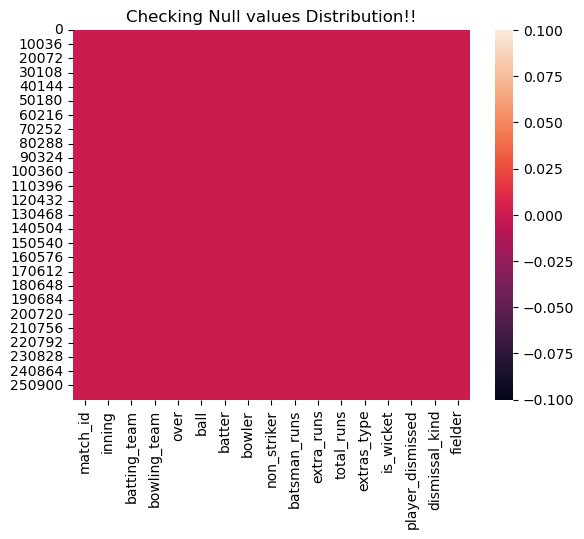

In [113]:
plt.title('Checking Null values Distribution!!')
sns.heatmap(df_deleveries.isna())
plt.show()

In [114]:
df_deleveries.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
254599,1426283,1,Gujarat Titans,Royal Challengers Bengaluru,4,9,Shubman Gill,Mohammed Siraj,B Sai Sudharsan,1,0,1,Unknown,0,Unknown,Unknown,Unknown


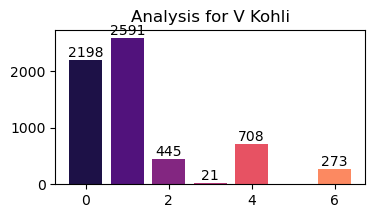

V Kohli Total Runs in IPL History: 8014


In [115]:
batsman = 'V Kohli'

player_df =df_deleveries[df_deleveries['batter'] == batsman]

x = player_df['batsman_runs'].value_counts().sort_index().index
y = player_df['batsman_runs'].value_counts().sort_index().values
plt.figure(figsize = (4,2))
plt.title(f'Analysis for {batsman}')
ax = plt.bar(x,y,color = sns.color_palette('magma',7))
plt.bar_label(ax)
plt.show()

total_runs = player_df['batsman_runs'].sum()

print(f'{batsman} Total Runs in IPL History: {total_runs}')

In [116]:
player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by = 'sum',ascending=False)

,bowler,sum,mean
199,R Ashwin,179,1.169935
260,UT Yadav,168,1.714286
3,A Mishra,162,1.500000
208,RA Jadeja,157,1.060811
62,DJ Bravo,157,1.427273
...,...,...,...
242,SS Cottrell,0,0.000000
59,D Brevis,0,0.000000
48,C Nanda,0,0.000000
190,P Suyal,0,0.000000


In [125]:
batsman = 'DA Miller'


def get_player_perfromance_stats(batsman):

  player_df =df_deleveries[df_deleveries['batter'] == batsman]

  x = player_df['batsman_runs'].value_counts().sort_index().index
  y = player_df['batsman_runs'].value_counts().sort_index().values
  plt.figure(figsize = (4,2))
  plt.title(f'Analysis for {batsman}')
  ax = plt.bar(x,y,color = sns.color_palette('magma',7))
  plt.bar_label(ax)
  plt.show()

  total_runs = player_df['batsman_runs'].sum()

  print(f'{batsman} Total Runs in IPL History: {total_runs}')


  print(f'Batsman {batsman} Top 10 Performance Against Bowlers')
  perfomance_df = player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by = 'sum',ascending=False).head(10)


  display(perfomance_df)


In [126]:
all_batsman = df_deleveries['batter'].unique()
print('done')

done


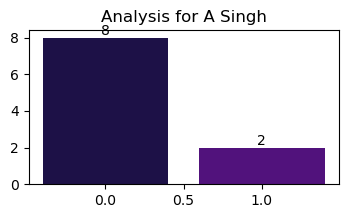

A Singh Total Runs in IPL History: 2
Batsman A Singh Top 10 Performance Against Bowlers


,bowler,sum,mean
1,AB Agarkar,1,0.5
2,DE Bollinger,1,1.0
0,A Mishra,0,0.0
3,KA Pollard,0,0.0
4,SK Raina,0,0.0
5,Shakib Al Hasan,0,0.0


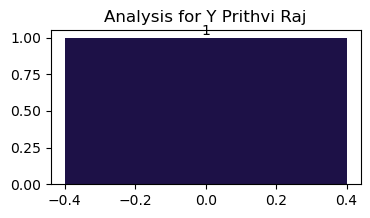

Y Prithvi Raj Total Runs in IPL History: 0
Batsman Y Prithvi Raj Top 10 Performance Against Bowlers


,bowler,sum,mean
0,B Kumar,0,0.0


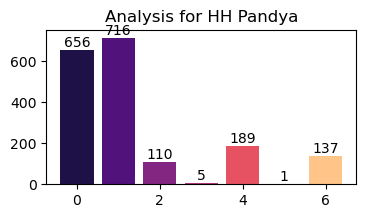

HH Pandya Total Runs in IPL History: 2534
Batsman HH Pandya Top 10 Performance Against Bowlers


,bowler,sum,mean
106,R Ashwin,79,1.580000
143,YS Chahal,71,0.934211
125,SP Narine,70,1.489362
117,Ravi Bishnoi,69,2.225806
4,A Zampa,60,2.400000
49,JD Unadkat,59,1.735294
31,DJ Bravo,55,1.410256
74,M Prasidh Krishna,55,1.718750
102,PJ Cummins,54,1.800000
58,K Rabada,53,1.432432


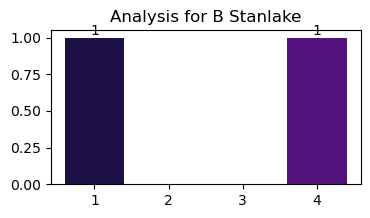

B Stanlake Total Runs in IPL History: 5
Batsman B Stanlake Top 10 Performance Against Bowlers


,bowler,sum,mean
0,BCJ Cutting,5,2.5


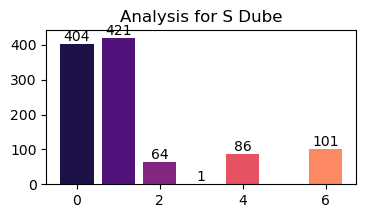

S Dube Total Runs in IPL History: 1502
Batsman S Dube Top 10 Performance Against Bowlers


,bowler,sum,mean
98,SN Thakur,54,1.384615
18,CV Varun,53,1.766667
80,R Ashwin,42,1.615385
105,T Natarajan,42,1.826087
89,Ravi Bishnoi,33,1.500000
43,K Rabada,33,1.178571
7,AS Joseph,32,1.032258
115,Yash Thakur,32,2.000000
64,MM Sharma,30,1.200000
88,Rashid Khan,28,1.555556


In [128]:
import random
for i in random.choices(all_batsman,k = 5):
  get_player_perfromance_stats(i)
